In [1]:
!pip install torch

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
training_df = pd.read_csv('Data/training_data_clean.csv')
training_df.head()

,sentiment,tweet
0,0,awww that is a bummer you should have got davi...
1,0,is upset that he can not update his facebook b...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it is not behaving at all i am mad why am i...


In [3]:
# positive reviews are labeled as 4, change that to 1

training_df['sentiment'] = training_df['sentiment'].apply(lambda x: 1 if x == 4 else 0)

In [4]:
training_df = training_df.dropna()

In [5]:
list_of_tweets = training_df['tweet'].tolist()

In [6]:
from collections import Counter

all_text = ' '.join(list_of_tweets)
words = all_text.split()

count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)
sorted_words

[('i', 985238),
 ('to', 615881),
 ('the', 520345),
 ('is', 385440),
 ('a', 377520),
 ('you', 353938),
 ('not', 342111),
 ('my', 314041),
 ('it', 299339),
 ('and', 298396),
 ('am', 232991),
 ('for', 215700),
 ('in', 214207),
 ('of', 194870),
 ('have', 185866),
 ('that', 172619),
 ('on', 167081),
 ('me', 160374),
 ('so', 150820),
 ('do', 132920),
 ('but', 127473),
 ('just', 125058),
 ('are', 117644),
 ('with', 114878),
 ('be', 112524),
 ('at', 111282),
 ('was', 111081),
 ('can', 109527),
 ('will', 105997),
 ('this', 93046),
 ('now', 90370),
 ('good', 89397),
 ('up', 88422),
 ('going', 87993),
 ('all', 83219),
 ('day', 82920),
 ('get', 81487),
 ('out', 80524),
 ('like', 77749),
 ('no', 73520),
 ('go', 72908),
 ('got', 69689),
 ('love', 65656),
 ('your', 65066),
 ('today', 64609),
 ('too', 64206),
 ('work', 62763),
 ('we', 62526),
 ('what', 60713),
 ('want', 58543),
 ('time', 56107),
 ('from', 55999),
 ('back', 55979),
 ('lol', 55175),
 ('did', 52629),
 ('one', 52191),
 ('about', 51660),
 

In [7]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
vocab_to_int

{'i': 1,
 'to': 2,
 'the': 3,
 'is': 4,
 'a': 5,
 'you': 6,
 'not': 7,
 'my': 8,
 'it': 9,
 'and': 10,
 'am': 11,
 'for': 12,
 'in': 13,
 'of': 14,
 'have': 15,
 'that': 16,
 'on': 17,
 'me': 18,
 'so': 19,
 'do': 20,
 'but': 21,
 'just': 22,
 'are': 23,
 'with': 24,
 'be': 25,
 'at': 26,
 'was': 27,
 'can': 28,
 'will': 29,
 'this': 30,
 'now': 31,
 'good': 32,
 'up': 33,
 'going': 34,
 'all': 35,
 'day': 36,
 'get': 37,
 'out': 38,
 'like': 39,
 'no': 40,
 'go': 41,
 'got': 42,
 'love': 43,
 'your': 44,
 'today': 45,
 'too': 46,
 'work': 47,
 'we': 48,
 'what': 49,
 'want': 50,
 'time': 51,
 'from': 52,
 'back': 53,
 'lol': 54,
 'did': 55,
 'one': 56,
 'about': 57,
 'know': 58,
 'really': 59,
 'had': 60,
 'see': 61,
 'there': 62,
 'some': 63,
 'how': 64,
 'its': 65,
 'if': 66,
 'they': 67,
 'still': 68,
 'would': 69,
 'new': 70,
 'night': 71,
 'think': 72,
 'well': 73,
 'as': 74,
 'amp': 75,
 'thanks': 76,
 'home': 77,
 'when': 78,
 'oh': 79,
 '2': 80,
 'he': 81,
 'more': 82,
 'here'

In [8]:
tweets_int = []
for tweet in list_of_tweets:
    r = [vocab_to_int[w] for w in tweet.split()]
    tweets_int.append(r)
tweets_int[0]

[436, 16, 4, 5, 1169, 6, 120, 15, 42, 831, 9848, 14, 1815, 36, 2, 20, 9, 426]

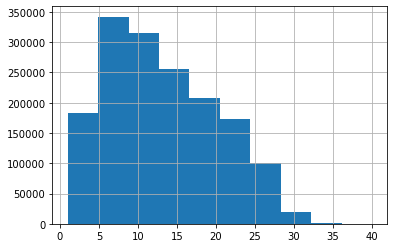

count    1.596607e+06
mean     1.297094e+01
std      7.156585e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.800000e+01
max      4.000000e+01
dtype: float64

In [9]:
# show length of tweets (helps decide sequence length for lstm)

tweet_len = [len(x) for x in tweets_int]
pd.Series(tweet_len).hist()
plt.show()
pd.Series(tweet_len).describe()

In [10]:
import numpy as np

seq_length = 20

# Return features of tweet ints, where each tweet is padded with 0's or truncated to the input seq_length.
def pad_features(tweets_int, seq_length):
    
    features = np.zeros((len(tweets_int), seq_length), dtype = int)
    
    for i, tweet in enumerate(tweets_int):
        tweet_len = len(tweet)
        
        if tweet_len <= seq_length:
            zeroes = list(np.zeros(seq_length-tweet_len))
            new = zeroes+tweet
        elif tweet_len > seq_length:
            new = tweet[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

features = pad_features(tweets_int, seq_length)
features

array([[    0,     0,   436, ...,    20,     9,   426],
       [    4,   741,    16, ...,  2261,   137,    45],
       [    0,     0,     0, ...,    38,    14, 22849],
       ...,
       [    0,     0,     0, ...,    18,    12,  1964],
       [    0,     0,     0, ..., 13953, 84448, 66937],
       [    0,     0,     0, ...,     0,     0,   115]])

In [11]:
# Split data into 80% training, 10% testing, 10% validation

y_labels = training_df['sentiment'].tolist()
len_feat = len(features)

split_frac = 0.8

train_x = np.array(features[0:int(split_frac*len_feat)])
train_y = np.array(y_labels[0:int(split_frac*len_feat)])

remaining_x = np.array(features[int(split_frac*len_feat):])
remaining_y = np.array(y_labels[int(split_frac*len_feat):])

valid_x = np.array(remaining_x[0:int(len(remaining_x)*0.5)])
valid_y = np.array(remaining_y[0:int(len(remaining_y)*0.5)])

test_x = np.array(remaining_x[int(len(remaining_x)*0.5):])
test_y = np.array(remaining_y[int(len(remaining_y)*0.5):])

In [12]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# shuffle data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [13]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [14]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256

n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(442632, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
# loss and optimization functions
train_on_gpu = False

lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.602134... Val Loss: 0.808964
Epoch: 1/4... Step: 200... Loss: 0.587675... Val Loss: 0.725159
Epoch: 1/4... Step: 300... Loss: 0.586502... Val Loss: 0.705140
Epoch: 1/4... Step: 400... Loss: 0.497989... Val Loss: 0.735716
Epoch: 1/4... Step: 500... Loss: 0.596528... Val Loss: 0.636961
Epoch: 1/4... Step: 600... Loss: 0.481478... Val Loss: 0.612604
Epoch: 1/4... Step: 700... Loss: 0.397895... Val Loss: 0.790664
Epoch: 1/4... Step: 800... Loss: 0.399738... Val Loss: 0.663482
Epoch: 1/4... Step: 900... Loss: 0.480359... Val Loss: 0.725579
Epoch: 1/4... Step: 1000... Loss: 0.602811... Val Loss: 0.640901
Epoch: 1/4... Step: 1100... Loss: 0.469839... Val Loss: 0.671040
Epoch: 1/4... Step: 1200... Loss: 0.517844... Val Loss: 0.520091
Epoch: 1/4... Step: 1300... Loss: 0.396963... Val Loss: 0.688465
Epoch: 1/4... Step: 1400... Loss: 0.456395... Val Loss: 0.689955
Epoch: 1/4... Step: 1500... Loss: 0.516059... Val Loss: 0.685274
Epoch: 1/4... Step: 1600... Loss: 

In [ ]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

In [ ]:
# Save trained model

torch.save(net, 'sentiment_analysis.pt')